In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from IPython.display import Image
import matplotlib.pyplot as plt
import os

In [5]:
# Define the directories
train_dir = 'train'
test_dir = 'test'
valid_dir = 'valid'

# Initialize the ImageDataGenerator
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1./255
)

# Define a function to load and preprocess the images
def load_and_preprocess_image(image_path, label_path):
    # Load the image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [192, 192])
    image = image_generator.random_transform(image)  # Apply the ImageDataGenerator transformations

    # Load the label
    label = tf.io.read_file(label_path)
    label = tf.image.decode_jpeg(label, channels=3)
    label = tf.image.resize(label, [192, 192])

    return image, label

# Define a function to load the dataset
def load_dataset(directory):
    # Use the path to the images as the label
    image_paths = tf.data.Dataset.list_files(os.path.join(directory, 'images/*'))
    labels_paths = tf.data.Dataset.list_files(os.path.join(directory, 'labels/*'))

    dataset = tf.data.Dataset.zip((image_paths, labels_paths))
    dataset = dataset.map(load_and_preprocess_image)

    return dataset

# Load the datasets
train_dataset = load_dataset(train_dir)
test_dataset = load_dataset(test_dir)
valid_dataset = load_dataset(valid_dir)


In [6]:
print(train_dataset)
print(test_dataset)
print(valid_dataset)

<_MapDataset element_spec=(TensorSpec(shape=(192, 192, 3), dtype=tf.float32, name=None), TensorSpec(shape=(192, 192, 3), dtype=tf.float32, name=None))>
<_MapDataset element_spec=(TensorSpec(shape=(192, 192, 3), dtype=tf.float32, name=None), TensorSpec(shape=(192, 192, 3), dtype=tf.float32, name=None))>
<_MapDataset element_spec=(TensorSpec(shape=(192, 192, 3), dtype=tf.float32, name=None), TensorSpec(shape=(192, 192, 3), dtype=tf.float32, name=None))>


Leaf Lego element

(-0.5, 639.5, 134.5, -0.5)

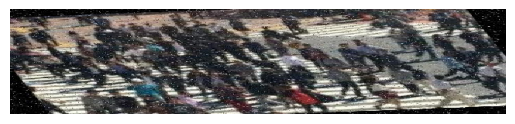

In [7]:
img_path = "train\images\img_1_jpg.rf.d1b26b71532c4db3b6fe602c5267bc50.jpg"

img = image.load_img(img_path, target_size = (135,640))

plt.imshow(img)
plt.axis("off")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 639.5, 134.5, -0.5)

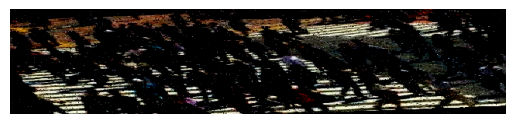

In [8]:
img_array = image.img_to_array(img)

img = tf.keras.applications.mobilenet.preprocess_input(img_array)

plt.imshow(img)
plt.axis("off")

Cherry lego element


(-0.5, 639.5, 134.5, -0.5)

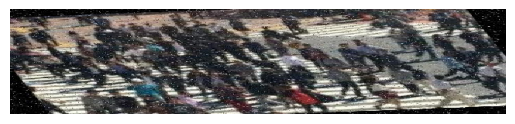

In [10]:
img = image.load_img(img_path, target_size = (135,640))
plt.imshow(img)
plt.axis("off")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 639.5, 134.5, -0.5)

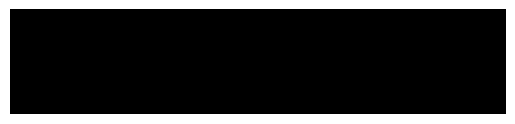

In [12]:
img_array = image.img_to_array(img)
img = tf.keras.applications.resnet50.preprocess_input(img_array)

plt.imshow(img)
plt.axis("off")

In [13]:
#  not a good idea, but why so that it's completely black

Blue Squre Lego Element

(-0.5, 639.5, 164.5, -0.5)

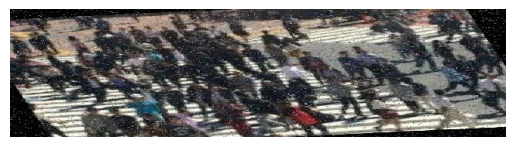

In [14]:
img = image.load_img(img_path, target_size=(165,640))

plt.imshow(img)
plt.axis("off")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 639.5, 164.5, -0.5)

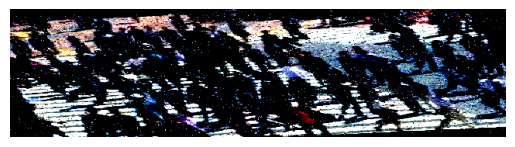

In [17]:
img_array = image.img_to_array(img)

img = tf.keras.applications.densenet.preprocess_input(img_array)

plt.imshow(img)
plt.axis("off")